In [1]:
import MetaTrader5 as mt5
import sys
import pandas as pd
import pickle
from pandas.plotting import register_matplotlib_converters

from datetime import datetime
# account details
import matplotlib.pyplot as plt
register_matplotlib_converters()


pip install keras --upgrade

In [6]:
import json

account={}
with open('__user.json') as f:
    account = json.load(f)


# Head

In [40]:
if not mt5.initialize(login=account["login"], server=account['server'],password=account['password']):
    print("\n Authorization fail \n\ninitialize() failed, error code =",mt5.last_error())
    quit()
else:
    print("\n Success Authorization \n")
    print(mt5.account_info())


 Success Authorization 

AccountInfo(login=79524542, trade_mode=0, leverage=100, limit_orders=200, margin_so_mode=0, trade_allowed=True, trade_expert=True, margin_mode=2, currency_digits=2, fifo_close=False, balance=100002.01, credit=0.0, profit=0.0, equity=100002.01, margin=0.0, margin_free=100002.01, margin_level=0.0, margin_so_call=50.0, margin_so_so=30.0, margin_initial=0.0, margin_maintenance=0.0, assets=0.0, liabilities=0.0, commission_blocked=0.0, name='Chanathip Parnsa-ard', server='MetaQuotes-Demo', currency='USD', company='MetaQuotes Software Corp.')


In [5]:
# prepare the buy request structure
symbol = "USDJPY"
symbol_info = mt5.symbol_info(symbol)
if symbol_info is None:
    print(symbol, "not found, can not call order_check()")
    mt5.shutdown()
    quit()

In [6]:
if not symbol_info.visible:
    print(symbol, "is not visible, trying to switch on")
    if not mt5.symbol_select(symbol,True):
        print("symbol_select({}}) failed, exit",symbol)
        mt5.shutdown()
        quit()

In [2]:
lot = 0.1
point = mt5.symbol_info(symbol).point
price = mt5.symbol_info_tick(symbol).ask
deviation = 20
request = {
    "action": mt5.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": lot,
    "type": mt5.ORDER_TYPE_BUY,
    "price": price,
    "sl": price - 100 * point,
    "tp": price + 100 * point,
    "deviation": deviation,
    "magic": 234000,
    "comment": "python script open",
    "type_time": mt5.ORDER_TIME_GTC,
    "type_filling": mt5.ORDER_FILLING_RETURN,
}

NameError: name 'account' is not defined

In [4]:
import MetaTrader5 as mt5
import sys
import pandas as pd
import pickle
from pandas.plotting import register_matplotlib_converters

from datetime import datetime
# account details
import matplotlib.pyplot as plt
register_matplotlib_converters()

import time
import json

account={}
with open('__user.json') as f:
    account = json.load(f)

if not mt5.initialize(login=account["login"], server=account['server'],password=account['password']):
    print("\n Authorization fail \n\ninitialize() failed, error code =",mt5.last_error())
    mt5.shutdown()
    quit()
else:
    print("\n Success Authorization \n")
# get account currency
account_currency=mt5.account_info().currency
print("Account currency:",account_currency)
 
# prepare the buy request structure
symbol = "USDJPY"
symbol_info = mt5.symbol_info(symbol)
if symbol_info is None:
    print(symbol, "not found, can not call order_check()")
    mt5.shutdown()
    quit()
 
# if the symbol is unavailable in MarketWatch, add it
if not symbol_info.visible:
    print(symbol, "is not visible, trying to switch on")
    if not mt5.symbol_select(symbol,True):
        print("symbol_select({}}) failed, exit",symbol)
        mt5.shutdown()
        quit()
 
lot = 0.01
point = mt5.symbol_info(symbol).point
price = mt5.symbol_info_tick(symbol).ask
deviation = 20
request = {
    "action": mt5.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": lot,
    "type": mt5.ORDER_TYPE_BUY,
    "price": price,
    "sl": price - 100 * point,
    "tp": price + 100 * point,
    "deviation": deviation,
    "magic": 234000,
    "comment": "python script open",
    "type_time": mt5.ORDER_TIME_GTC,
    "type_filling": mt5.ORDER_FILLING_RETURN,
}
 
# send a trading request
result = mt5.order_send(request)
# check the execution result
print("1. order_send(): by {} {} lots at {} with deviation={} points".format(symbol,lot,price,deviation));
if result.retcode != mt5.TRADE_RETCODE_DONE:
    print("2. order_send failed, retcode={}".format(result.retcode))
    # request the result as a dictionary and display it element by element
    result_dict=result._asdict()
    for field in result_dict.keys():
        print("   {}={}".format(field,result_dict[field]))
        # if this is a trading request structure, display it element by element as well
        if field=="request":
            traderequest_dict=result_dict[field]._asdict()
            for tradereq_filed in traderequest_dict:
                print("       traderequest: {}={}".format(tradereq_filed,traderequest_dict[tradereq_filed]))
    print("shutdown() and quit")
    mt5.shutdown()
    quit()
 
print("2. order_send done, ", result)
print("   opened position with POSITION_TICKET={}".format(result.order))
print("   sleep 2 seconds before closing position #{}".format(result.order))
time.sleep(2)
# create a close request
position_id=result.order
price=mt5.symbol_info_tick(symbol).bid
deviation=20
request={
    "action": mt5.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": lot,
    "type": mt5.ORDER_TYPE_SELL,
    "position": position_id,
    "price": price,
    "deviation": deviation,
    "magic": 234000,
    "comment": "python script close",
    "type_time": mt5.ORDER_TIME_GTC,
    "type_filling": mt5.ORDER_FILLING_RETURN,
}
# send a trading request
result=mt5.order_send(request)
# check the execution result
print("3. close position #{}: sell {} {} lots at {} with deviation={} points".format(position_id,symbol,lot,price,deviation));
if result.retcode != mt5.TRADE_RETCODE_DONE:
    print("4. order_send failed, retcode={}".format(result.retcode))
    print("   result",result)
else:
    print("4. position #{} closed, {}".format(position_id,result))
    # request the result as a dictionary and display it element by element
    result_dict=result._asdict()
    for field in result_dict.keys():
        print("   {}={}".format(field,result_dict[field]))
        # if this is a trading request structure, display it element by element as well
        if field=="request":
            traderequest_dict=result_dict[field]._asdict()
            for tradereq_filed in traderequest_dict:
                print("       traderequest: {}={}".format(tradereq_filed,traderequest_dict[tradereq_filed]))
 
# shut down connection to the MetaTrader 5 terminal
mt5.shutdown()


 Success Authorization 

Account currency: USD
1. order_send(): by USDJPY 0.01 lots at 151.528 with deviation=20 points
2. order_send done,  OrderSendResult(retcode=10009, deal=2368498168, order=2394273028, volume=0.01, price=151.528, bid=151.523, ask=151.529, comment='Request executed', request_id=2353929532, retcode_external=0, request=TradeRequest(action=1, magic=234000, order=0, symbol='USDJPY', volume=0.01, price=151.528, stoplimit=0.0, sl=151.428, tp=151.628, deviation=20, type=0, type_filling=2, type_time=0, expiration=0, comment='python script open', position=0, position_by=0))
   opened position with POSITION_TICKET=2394273028
   sleep 2 seconds before closing position #2394273028
3. close position #2394273028: sell USDJPY 0.01 lots at 151.523 with deviation=20 points
4. position #2394273028 closed, OrderSendResult(retcode=10009, deal=2368498325, order=2394273184, volume=0.01, price=151.523, bid=151.525, ask=151.531, comment='Request executed', request_id=2353929533, retcode_

True

In [10]:
# request 1000 ticks from EURAUD
euraud_ticks = mt5.copy_ticks_from("EURAUD", datetime(2020,1,28,13), 1000, mt5.COPY_TICKS_ALL)
# request ticks from AUDUSD within 2019.04.01 13:00 - 2019.04.02 13:00
audusd_ticks = mt5.copy_ticks_range("AUDUSD", datetime(2020,1,27,13), datetime(2020,1,28,13), mt5.COPY_TICKS_ALL)
 
# get bars from different symbols in a number of ways
eurusd_rates = mt5.copy_rates_from("EURUSD", mt5.TIMEFRAME_M1, datetime(2020,1,28,13), 1000)
eurgbp_rates = mt5.copy_rates_from_pos("EURGBP", mt5.TIMEFRAME_M1, 0, 1000)
eurcad_rates = mt5.copy_rates_range("EURCAD", mt5.TIMEFRAME_M1, datetime(2020,1,27,13), datetime(2020,1,28,13))
 
# shut down connection to MetaTrader 5

 
#DATA
print('euraud_ticks(', len(euraud_ticks), ')')
for val in euraud_ticks[:10]: print(val)
 
print('audusd_ticks(', len(audusd_ticks), ')')
for val in audusd_ticks[:10]: print(val)
 

print('eurgbp_rates(', len(eurgbp_rates), ')')
for val in eurgbp_rates[:10]: print(val)
 
print('eurcad_rates(', len(eurcad_rates), ')')
for val in eurcad_rates[:10]: print(val)
 



euraud_ticks( 1000 )
(1580191200, 1.63081, 1.63109, 0., 0, 1580191200200, 130, 0.)
(1580191200, 1.63078, 1.63108, 0., 0, 1580191200410, 134, 0.)
(1580191200, 1.63077, 1.63108, 0., 0, 1580191200604, 130, 0.)
(1580191200, 1.63079, 1.63109, 0., 0, 1580191200902, 134, 0.)
(1580191201, 1.6308, 1.63108, 0., 0, 1580191201111, 134, 0.)
(1580191201, 1.63081, 1.63108, 0., 0, 1580191201306, 130, 0.)
(1580191201, 1.63077, 1.63108, 0., 0, 1580191201603, 130, 0.)
(1580191201, 1.63079, 1.63108, 0., 0, 1580191201818, 130, 0.)
(1580191202, 1.6308, 1.63108, 0., 0, 1580191202008, 130, 0.)
(1580191202, 1.63081, 1.63108, 0., 0, 1580191202213, 130, 0.)
audusd_ticks( 39944 )
(1580104800, 0.68075, 0.68084, 0., 0, 1580104800296, 130, 0.)
(1580104802, 0.68075, 0.68083, 0., 0, 1580104802290, 4, 0.)
(1580104805, 0.68078, 0.68085, 0., 0, 1580104805190, 134, 0.)
(1580104808, 0.68077, 0.68085, 0., 0, 1580104808292, 130, 0.)
(1580104819, 0.68075, 0.68083, 0., 0, 1580104819512, 134, 0.)
(1580104820, 0.68076, 0.68083, 

# SETTING

In [15]:

# ระบุสัญญาซื้อขาย, ช่วงเวลา และช่วงเวลาที่ต้องการ
symbol = "EURUSD"
from_date = pd.Timestamp("2024-03-16")
count =  800 #จำรนวนนับจาก Y-M-D  
to_date = datetime(2024, 3, 16)

# คัดลอกข้อมูลราคาจากแม่แบบ
rates = mt5.copy_rates_from(symbol, mt5.TIMEFRAME_M5, from_date, count)

# สร้าง DataFrame จากข้อมูลราคา
df = pd.DataFrame(rates)

# แปลงคอลัมน์ 'time' เป็นชนิด datetime
df['time'] = pd.to_datetime(df['time'], unit='s')

# ตั้งค่าคอลัมน์ 'time' เป็น index
df.set_index('time', inplace=True)

df['time'] = df.index.strftime('%H:%M:%S')

สร้าง Multi trad core มีการ fit เลื่อยเมื่อ มีการเปลี่ยนแปลงของ กราฟ ทุก 30 นาที เลือกใช้งานตัวที่มีความแม่นยำสูงที่สุดจากนั้นเลือกตัวนั้นมา Predict ราคาซื้อขาย

In [32]:
df[:2]

,open,high,low,close,tick_volume,spread,real_volume,time
time,,,,,,,,
2024-03-13 04:20:00,1.09257,1.09259,1.09246,1.09253,118,1,0,04:20:00
2024-03-13 04:25:00,1.09253,1.09254,1.09246,1.09248,57,1,0,04:25:00


In [39]:
df[:-1]

,open,high,low,close,tick_volume,spread,real_volume,time
time,,,,,,,,
2024-03-13 04:20:00,1.09257,1.09259,1.09246,1.09253,118,1,0,04:20:00
2024-03-13 04:25:00,1.09253,1.09254,1.09246,1.09248,57,1,0,04:25:00
2024-03-13 04:30:00,1.09248,1.09253,1.09245,1.09248,82,1,0,04:30:00
2024-03-13 04:35:00,1.09248,1.09259,1.09248,1.09257,80,0,0,04:35:00
2024-03-13 04:40:00,1.09257,1.09270,1.09255,1.09269,85,1,0,04:40:00
...,...,...,...,...,...,...,...,...
2024-03-15 22:30:00,1.08891,1.08898,1.08891,1.08892,49,2,0,22:30:00
2024-03-15 22:35:00,1.08892,1.08895,1.08892,1.08893,27,2,0,22:35:00
2024-03-15 22:40:00,1.08893,1.08894,1.08886,1.08892,32,1,0,22:40:00


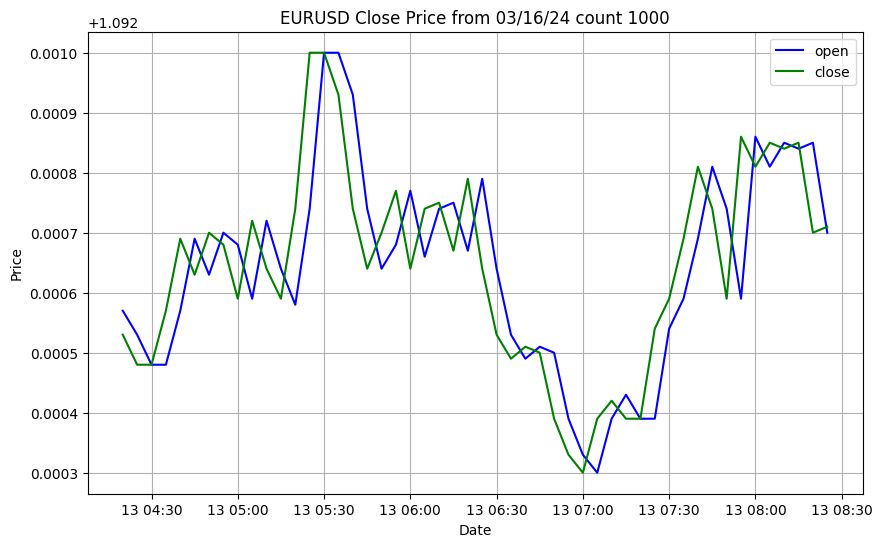

In [40]:

# พล็อตข้อมูลราคา
plt.figure(figsize=(10, 6))
plt.plot(df[:50].index, df[:50]['open'], label='open', color='blue')
plt.plot(df[:50].index, df[:50]['close'], label='close', color='green')
plt.title('EURUSD Close Price from {} count 1000'.format(from_date.strftime('%D')))
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
df

,open,high,low,close,tick_volume,spread,real_volume,time
time,,,,,,,,
2024-02-23 06:25:00,1.08278,1.08283,1.08275,1.08281,120,0,0,06:25:00
2024-02-23 06:30:00,1.08282,1.08284,1.08275,1.08278,93,0,0,06:30:00
2024-02-23 06:35:00,1.08281,1.08281,1.08271,1.08277,74,0,0,06:35:00
2024-02-23 06:40:00,1.08279,1.08279,1.08265,1.08268,53,0,0,06:40:00
2024-02-23 06:45:00,1.08267,1.08270,1.08265,1.08267,59,0,0,06:45:00
...,...,...,...,...,...,...,...,...
2024-02-26 23:40:00,1.08490,1.08502,1.08487,1.08492,42,2,0,23:40:00
2024-02-26 23:45:00,1.08492,1.08513,1.08491,1.08492,69,3,0,23:45:00
2024-02-26 23:50:00,1.08491,1.08509,1.08491,1.08497,34,3,0,23:50:00


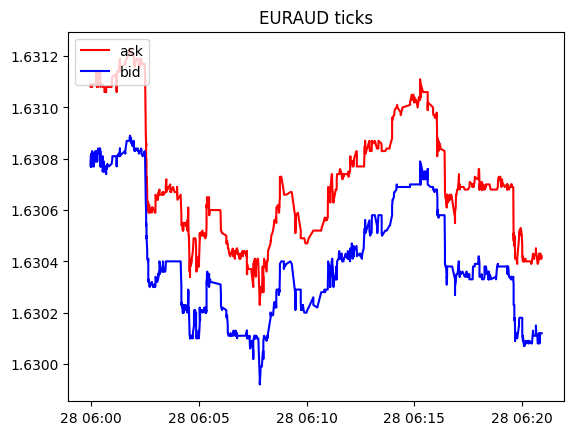

In [13]:
#PLOT
# create DataFrame out of the obtained data
ticks_frame = pd.DataFrame(euraud_ticks)
# convert time in seconds into the datetime format
ticks_frame['time']=pd.to_datetime(ticks_frame['time'], unit='s')
# display ticks on the chart
plt.plot(ticks_frame['time'], ticks_frame['ask'], 'r-', label='ask')
plt.plot(ticks_frame['time'], ticks_frame['bid'], 'b-', label='bid')
 
# display the legends
plt.legend(loc='upper left')
 
# add the header
plt.title('EURAUD ticks')
 
# display the chart
plt.show()

In [61]:
mt5.account_info()

AccountInfo(login=79524542, trade_mode=0, leverage=100, limit_orders=200, margin_so_mode=0, trade_allowed=True, trade_expert=True, margin_mode=2, currency_digits=2, fifo_close=False, balance=100000.0, credit=0.0, profit=0.0, equity=100000.0, margin=0.0, margin_free=100000.0, margin_level=0.0, margin_so_call=50.0, margin_so_so=30.0, margin_initial=0.0, margin_maintenance=0.0, assets=0.0, liabilities=0.0, commission_blocked=0.0, name='Chanathip Parnsa-ard', server='MetaQuotes-Demo', currency='USD', company='MetaQuotes Software Corp.')

In [62]:
mt5.terminal_info()

TerminalInfo(community_account=True, community_connection=True, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=4201, maxbars=100000, codepage=0, ping_last=273724, community_balance=0.0, retransmission=0.008447717078998081, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='English', path='C:\\Program Files\\MetaTrader 5', data_path='C:\\Users\\parns\\AppData\\Roaming\\MetaQuotes\\Terminal\\D0E8209F77C8CF37AD8BF550E51FF075', commondata_path='C:\\Users\\parns\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')

In [63]:
symbols=mt5.symbols_get()
print('Symbols: ', len(symbols))

Symbols:  140


In [9]:
import time
i = 0
while True:
    i = i+1
    time.sleep(1)
    print(i)
    if i > 6 :
        break

1
2
3
4
5
6
7


In [14]:
# get the number of orders in history
from_date=datetime(2020,1,1)
to_date=datetime.now()
history_orders=mt5.history_orders_total(from_date, datetime.now())
if history_orders>0:
    print("Total history orders=",history_orders)
else:
    print("Orders not found in history")
 
# shut down connection to the MetaTrader 5 terminal


Orders not found in history


In [65]:
positions_total=mt5.positions_total()
if positions_total>0:
    print("Total positions=",positions_total)
else:
    print("Positions not found")

Positions not found


pip install tensorflow

pip install tf-nightly

pip install keras 

--upgrade

In [8]:
import numpy as np

# สร้างฟังก์ชั่นสำหรับสร้างข้อมูลลำดับเวลาที่มีลักษณะเป็น sinusoidal waveform
def generate_time_series(num_series, num_timesteps, freq=1, noise_range=0.1):
    # สร้างตัวแปรสำหรับเก็บข้อมูลลำดับเวลาทั้งหมด
    time_series_data = []
    
    for _ in range(num_series):
        # สร้างลักษณะ sinusoidal waveform
        time_steps = np.arange(0, num_timesteps)
        sinusoidal_waveform = np.sin(2 * np.pi * freq * (time_steps / float(num_timesteps)))
        
        # เพิ่ม noise เพื่อทำให้ข้อมูลเป็นสมจริงมากขึ้น
        noise = np.random.uniform(-noise_range, noise_range, size=num_timesteps)
        noisy_waveform = sinusoidal_waveform + noise
        
        time_series_data.append(noisy_waveform)
    
    # แปลง list เป็น numpy array
    time_series_data = np.array(time_series_data)
    
    return time_series_data

# กำหนดพารามิเตอร์
num_series = 1000  # จำนวนของลำดับข้อมูลที่จะสร้าง
num_timesteps = 50  # จำนวนขั้นตอนในลำดับข้อมูลแต่ละลำดับ
freq = 0.1  # ความถี่ของ sinusoidal waveform
noise_range = 0.1  # ช่วงของค่า noise ที่เพิ่มเข้าไปในข้อมูล

# สร้างข้อมูลลำดับเวลา
time_series_data = generate_time_series(num_series, num_timesteps, freq, noise_range)

# พิมพ์รูปร่างของข้อมูล
print("รูปร่างของข้อมูลลำดับเวลา:", time_series_data.shape)
print("ตัวอย่างข้อมูลลำดับเวลาแรก:\n", time_series_data[0])


รูปร่างของข้อมูลลำดับเวลา: (1000, 50)
ตัวอย่างข้อมูลลำดับเวลาแรก:
 [-0.08673999  0.02344854  0.09925588  0.12915382  0.06331055  0.00418235
  0.13493575  0.14862284  0.18706698  0.21072593  0.16587855  0.1516033
  0.0963924   0.11397503  0.15861114  0.26082776  0.17055228  0.21507933
  0.31771598  0.32012615  0.18528545  0.27230872  0.22584548  0.25188245
  0.22604323  0.39179107  0.4005252   0.30377332  0.36923772  0.36650995
  0.28740102  0.35213242  0.44955404  0.45391254  0.43441056  0.37601524
  0.3833686   0.4402406   0.54451722  0.44189909  0.5631487   0.46598123
  0.5077428   0.52938066  0.58102303  0.53550884  0.46362329  0.60108343
  0.63694455  0.55866115]


In [6]:
import tensorflow as tf

# สร้างโมเดล LSTM
def build_lstm_model(input_shape, output_units):
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(units=64, input_shape=input_shape),
        tf.keras.layers.Dropout(0.5),  # เพิ่ม Dropout เพื่อลด Overfitting
        tf.keras.layers.Dense(units=output_units, activation='softmax')
    ])
    return model

# กำหนดขนาดของข้อมูลนำเข้าและจำนวนหน่วยของชั้นผลลัพธ์
input_shape = (timesteps, input_dim)  # เปลี่ยนค่า timesteps และ input_dim ตามข้อมูลของคุณ
output_units = num_classes  # เปลี่ยน num_classes ตามจำนวนคลาสของปัญหาของคุณ

# สร้างโมเดล LSTM
lstm_model = build_lstm_model(input_shape, output_units)

# คอมไพล์และฝึกโมเดล
lstm_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# สรุปโครงสร้างของโมเดล
lstm_model.summary()


In [ ]:
mt5.shutdown()